# Customer Segmentation Using Machine Learning
#### _Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately._




#### Step-I Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step-II Retrieving the dataset

In [2]:
CS_data = pd.read_csv('CustomerSegmentation1.csv')
CS_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


#### Step-III - Reading Dataset

In [3]:
print(CS_data.shape) 
print(CS_data.head(2))
print(CS_data.tail(2))
print(CS_data.columns)
print(CS_data.info)

(8068, 11)
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  462809    Male           No   22        No  Healthcare              1.0   
1  462643  Female          Yes   38       Yes    Engineer              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
8066  467299  Female           No   27       Yes  Healthcare              1.0   
8067  461879    Male          Yes   37       Yes   Executive              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
8066            Low          4.0  Cat_6            B  
8067        Average          3.0  Cat_4            B  
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
<b

#### Step-IV - Extraction of dependent and independent vairables.

In [4]:
CS_data = CS_data.drop(['ID'], axis=1)
CS_data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
X = CS_data.iloc[:,0:9] # Independent variable
Y = CS_data.iloc[:,9:10] # Dependent variable

In [6]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [7]:
Y

,Segmentation
0,D
1,A
2,B
3,B
4,A
...,...
8063,D
8064,D
8065,D
8066,B


#### Step-V- Missing values

In [8]:
print(CS_data.isnull().sum())

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


#### Step-VI- Handling the Missing values

#####  -using Fill_na

In [9]:
mean_age= CS_data['Work_Experience'].mean()                      
CS_data['Work_Experience'].fillna(mean_age , inplace= True)
mean_income= CS_data['Family_Size'].mean()
CS_data['Family_Size'].fillna(mean_income , inplace= True)


##### -for catagorical data using replace method

In [10]:
mode1=CS_data['Ever_Married'].mode()
mode2=CS_data['Profession'].mode()
mode3=CS_data['Var_1'].mode()
mode4=CS_data['Graduated'].mode()
print('Mode Ever_Married-->', mode1)
print('Mode Profession-->',mode2)
print('Mode Var_1-->',mode3)
print('Mode Graduated-->',mode4)


Mode Ever_Married--> 0    Yes
dtype: object
Mode Profession--> 0    Artist
dtype: object
Mode Var_1--> 0    Cat_6
dtype: object
Mode Graduated--> 0    Yes
dtype: object


In [11]:
CS_data['Ever_Married'].replace(np.nan,'Yes', inplace=True )
CS_data['Profession'].replace(np.nan,'Artist', inplace=True )
CS_data['Var_1'].replace(np.nan,'Cat_6', inplace=True )
CS_data['Graduated'].replace(np.nan,'Yes', inplace=True )
CS_data['Var_1']=CS_data['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7 })


In [12]:
print(CS_data.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [13]:
X = CS_data.iloc[:,0:9] # Independent variable
Y = CS_data.iloc[:,9:10] # Dependent variable
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,4
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,4
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,6
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,6
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.000000,Low,7.0,1
8064,Male,No,35,No,Executive,3.000000,Low,4.0,4
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,6
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,6


#### Step-VII- Handle the catagorical data

##### option-1-Label Ecoding

In [14]:
# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()
# Y=Le.fit_transform(Y)
# Y

##### option-2-Get Dummies

In [15]:
NewX = pd.get_dummies(X)
NewX



,Age,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.000000,4.0,4,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,38,2.641663,3.0,4,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,67,1.000000,1.0,6,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,67,0.000000,2.0,6,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
4,40,2.641663,6.0,6,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.000000,7.0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8064,35,3.000000,4.0,4,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.000000,1.0,6,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.000000,4.0,6,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [16]:
NewX = NewX.values
NewX

array([[22.        ,  1.        ,  4.        , ...,  0.        ,
         0.        ,  1.        ],
       [38.        ,  2.64166321,  3.        , ...,  1.        ,
         0.        ,  0.        ],
       [67.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [33.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [27.        ,  1.        ,  4.        , ...,  0.        ,
         0.        ,  1.        ],
       [37.        ,  0.        ,  3.        , ...,  1.        ,
         0.        ,  0.        ]])

#### Step-VIII- Handling Target Catagorical Column 

In [17]:
Y.head(5)

,Segmentation
0,D
1,A
2,B
3,B
4,A


In [18]:
Y.replace('A', 1, inplace=True)
Y.replace('B', 2, inplace=True)
Y.replace('C', 3, inplace=True)
Y.replace('D', 4, inplace=True)

In [19]:
Y = Y.values

#### Step-XI- Splitting DataSet into Training(80%) and Testing(20%)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(NewX,Y, test_size = 0.2, random_state = 0)

#### Step-X- feature Scaling

##### option-1-Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test =sc.transform(X_test)

##### option-2-Normalization

In [22]:
# from sklearn.preprocessing import MinMaxScaler
# mnsc = MinMaxScaler()
# X_train= mnsc.fit_transform(X_train)
# X_test =mnsc.transform(X_test)


## Model Creation

### _-Using Decision Tree_

In [23]:
# DT model building
from sklearn.tree import DecisionTreeClassifier
#DTC=DecisionTreeClassifier(criterion='entropy') # IG
DTC=DecisionTreeClassifier(criterion='gini') # Gini Index
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
# Predcition on test data
Y_pred=DTC.predict(X_test)

In [25]:
# Confusion matrix for evaluating the perfomance of model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[139, 105,  70,  70],
       [ 95, 116, 134,  54],
       [ 76, 110, 167,  27],
       [101,  46,  46, 258]], dtype=int64)

<AxesSubplot:>

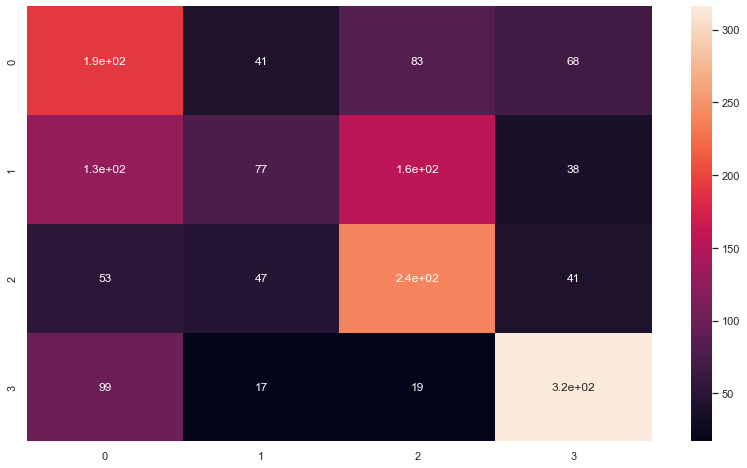

In [59]:
# Heatmap
sns.heatmap(cm, annot=True)

In [27]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

42.13135068153655

In [28]:
#complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.34      0.36      0.35       384
           2       0.31      0.29      0.30       399
           3       0.40      0.44      0.42       380
           4       0.63      0.57      0.60       451

    accuracy                           0.42      1614
   macro avg       0.42      0.42      0.42      1614
weighted avg       0.43      0.42      0.42      1614



### _-Using Knn_

In [103]:
# Creating the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12,p=2)
knn.fit(X_train, Y_train)

E:\Python\anaconda setup\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [104]:
# Prediction ---Test dataset
Y_pred=knn.predict(X_test)
Y_pred

array([2, 4, 3, ..., 3, 4, 1], dtype=int64)

In [105]:
# Evaluating the perfromane of the model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[179,  76,  61,  68],
       [112, 130, 117,  40],
       [ 54,  80, 202,  44],
       [102,  31,  16, 302]], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100


50.371747211895915

In [107]:
#complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.40      0.47      0.43       384
           2       0.41      0.33      0.36       399
           3       0.51      0.53      0.52       380
           4       0.67      0.67      0.67       451

    accuracy                           0.50      1614
   macro avg       0.50      0.50      0.50      1614
weighted avg       0.50      0.50      0.50      1614



In [102]:
# another way to check the accuarcy--
knn.score(X_test, Y_test)*100

49.19454770755886

<AxesSubplot:>

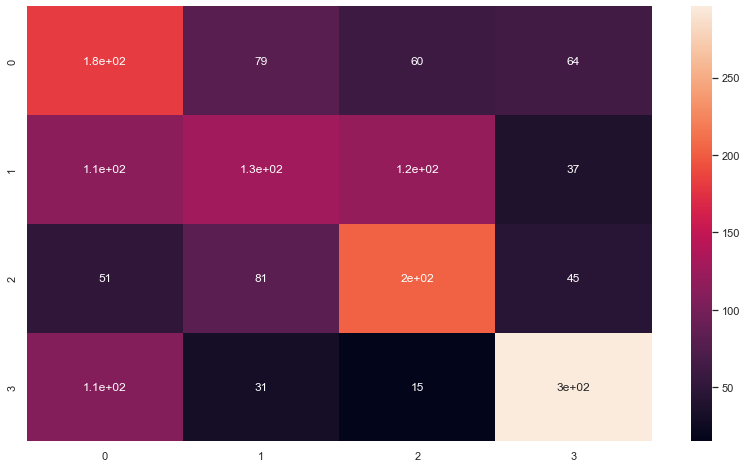

In [88]:
# haetmap
import seaborn as sns
sns.heatmap(cm, annot=True)

### _-Using Naive Bayes_

In [36]:
# Model Creation ---Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(X_train, Y_train) # training dataset

E:\Python\anaconda setup\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [37]:
# Prediction
Y_pred=NBC.predict(X_test)

In [38]:
# evaluate the perfromance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[146,  70,  99,  69],
       [ 96,  80, 187,  36],
       [ 28,  50, 255,  47],
       [ 77,  42,  32, 300]], dtype=int64)

In [39]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100 

48.38909541511772

In [40]:
#complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.42      0.38      0.40       384
           2       0.33      0.20      0.25       399
           3       0.45      0.67      0.54       380
           4       0.66      0.67      0.66       451

    accuracy                           0.48      1614
   macro avg       0.47      0.48      0.46      1614
weighted avg       0.47      0.48      0.47      1614



<AxesSubplot:>

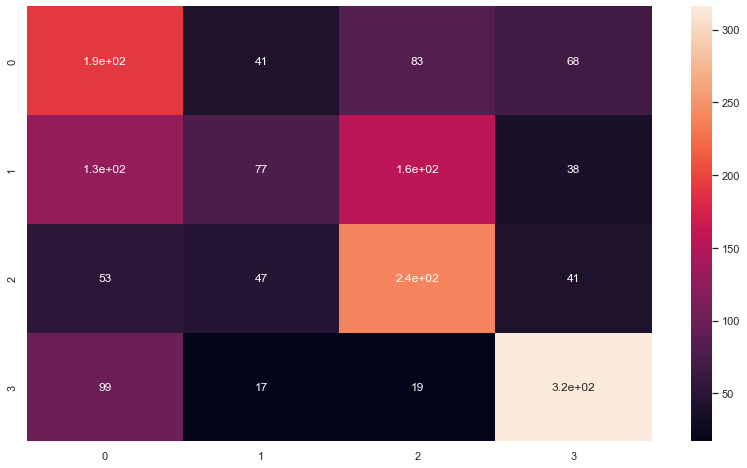

In [62]:
# haetmap
import seaborn as sns
sns.heatmap(cm, annot=True)

### _-Using Logistic Regression_

In [42]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression()
LRC.fit(X_train , Y_train)

E:\Python\anaconda setup\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [43]:
#prediction
Y_pred = LRC.predict(X_test)
Y_pred

array([3, 4, 3, ..., 3, 1, 3], dtype=int64)

In [44]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[192,  41,  83,  68],
       [129,  77, 155,  38],
       [ 53,  47, 239,  41],
       [ 99,  17,  19, 316]], dtype=int64)

In [45]:
#Complete performance report
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , Y_pred) * 100

51.053283767038415

In [46]:
#complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.41      0.50      0.45       384
           2       0.42      0.19      0.27       399
           3       0.48      0.63      0.55       380
           4       0.68      0.70      0.69       451

    accuracy                           0.51      1614
   macro avg       0.50      0.51      0.49      1614
weighted avg       0.51      0.51      0.49      1614



<AxesSubplot:>

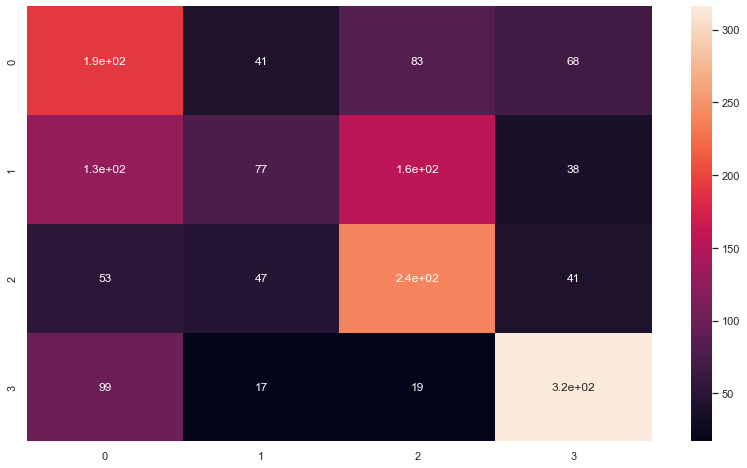

In [63]:
sns.heatmap(cm , annot = True)

## _Clustering for Segmentation_

In [48]:
CS_data.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,6,A


In [49]:
X1= CS_data.iloc[:,0:9]
X1


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,4
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,4
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,6
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,6
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.000000,Low,7.0,1
8064,Male,No,35,No,Executive,3.000000,Low,4.0,4
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,6
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,6


In [50]:
X1 = pd.get_dummies(X1)
X1 = X1.values


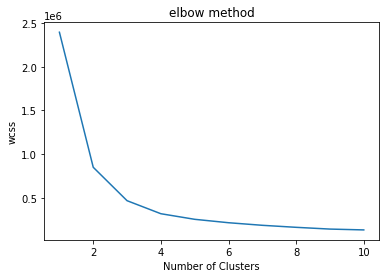

In [51]:
# Find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [52]:
# Create the model after calculating the k value by elbow methdo
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
# fit the data
kmeans.fit(X1)

KMeans(n_clusters=4)

In [53]:
Y_kmeans=kmeans.predict(X1)
Y_kmeans

array([1, 3, 2, ..., 3, 1, 3])

In [54]:
# Visulization of clusters
kmeans.cluster_centers_

array([[5.38009259e+01, 1.95564954e+00, 2.81432948e+00, 5.26388889e+00,
        4.17181070e-01, 5.82818930e-01, 1.29115226e-01, 8.70884774e-01,
        2.13477366e-01, 7.86522634e-01, 5.05144033e-01, 6.06995885e-02,
        9.56790123e-02, 1.43518519e-01, 1.12139918e-01, 1.74897119e-02,
        2.00617284e-02, 2.26337449e-02, 2.26337449e-02, 4.30555556e-01,
        1.79526749e-01, 3.89917695e-01],
       [2.59805668e+01, 3.01791460e+00, 3.46292115e+00, 4.89919028e+00,
        4.59109312e-01, 5.40890688e-01, 8.08097166e-01, 1.91902834e-01,
        6.33198381e-01, 3.66801619e-01, 1.28340081e-01, 1.23886640e-01,
        7.28744939e-02, 9.35222672e-02, 2.67206478e-02, 4.55060729e-01,
        4.17004049e-02, 1.61943320e-03, 5.62753036e-02, 7.36842105e-02,
        3.88663968e-02, 8.87449393e-01],
       [7.47896200e+01, 1.35118126e+00, 2.08647556e+00, 5.60148285e+00,
        4.17979611e-01, 5.82020389e-01, 4.81927711e-02, 9.51807229e-01,
        3.68860056e-01, 6.31139944e-01, 1.96478221e-01

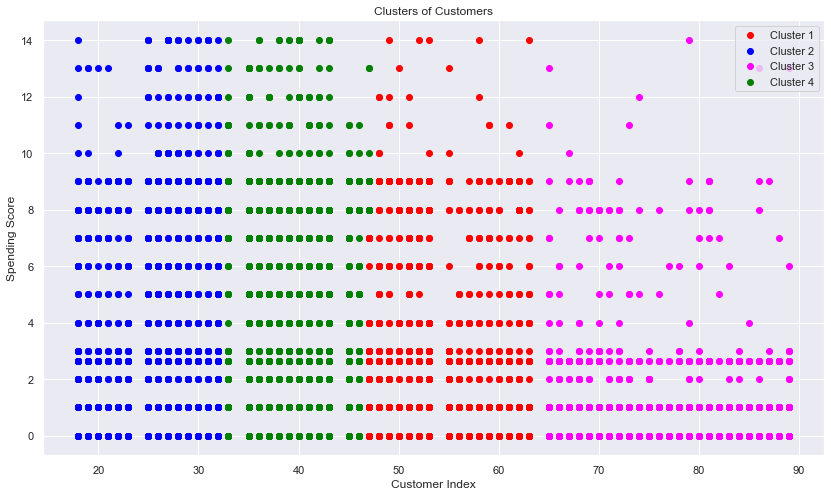

In [108]:
plt.scatter(X1[Y_kmeans==0, 0], X1[Y_kmeans==0, 1], c='red', label='Cluster 1' )
plt.scatter(X1[Y_kmeans==1, 0], X1[Y_kmeans==1, 1], c='blue', label='Cluster 2' )
plt.scatter(X1[Y_kmeans==2, 0], X1[Y_kmeans==2, 1], c='magenta', label='Cluster 3' )
plt.scatter(X1[Y_kmeans==3, 0], X1[Y_kmeans==3, 1], c='green', label='Cluster 4' )

plt.legend()
plt.title('Clusters of Customers')
plt.xlabel('Customer Index')
plt.ylabel('Spending Score')
plt.show()

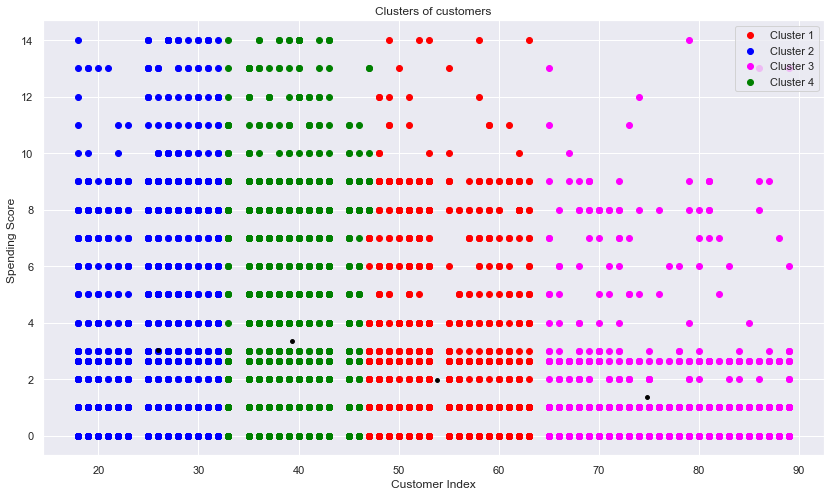

In [109]:
# Data Visulization (with cetroid)
plt.scatter(X1[Y_kmeans==0, 0], X1[Y_kmeans==0, 1], c='red', label='Cluster 1' )
plt.scatter(X1[Y_kmeans==1, 0], X1[Y_kmeans==1, 1], c='blue', label='Cluster 2' )
plt.scatter(X1[Y_kmeans==2, 0], X1[Y_kmeans==2, 1], c='magenta', label='Cluster 3' )
plt.scatter(X1[Y_kmeans==3, 0], X1[Y_kmeans==3, 1], c='green', label='Cluster 4' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c='black', s=15)
plt.legend()
            
plt.title('Clusters of customers')
plt.xlabel('Customer Index')
plt.ylabel('Spending Score ')
plt.show()

__------------------------------------------------------------------------------------------END OF SECTION 1--------------------------------------------------------------------------------------------__





#  Data Visualization - using  Matplotlib & Seaborn

## 1) Analysis on the basis of Spending Score

### - Customer with profession and their spending score

In [57]:
CS_data['Index'] = np.arange(len(CS_data))
CS_data.head(8)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Index
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,4,D,0
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,4,A,1
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,6,B,2
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,6,B,3
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,6,A,4
5,Male,Yes,56,No,Artist,0.000000,Average,2.0,6,C,5
6,Male,No,32,Yes,Healthcare,1.000000,Low,3.0,6,C,6
7,Female,No,33,Yes,Healthcare,1.000000,Low,3.0,6,D,7


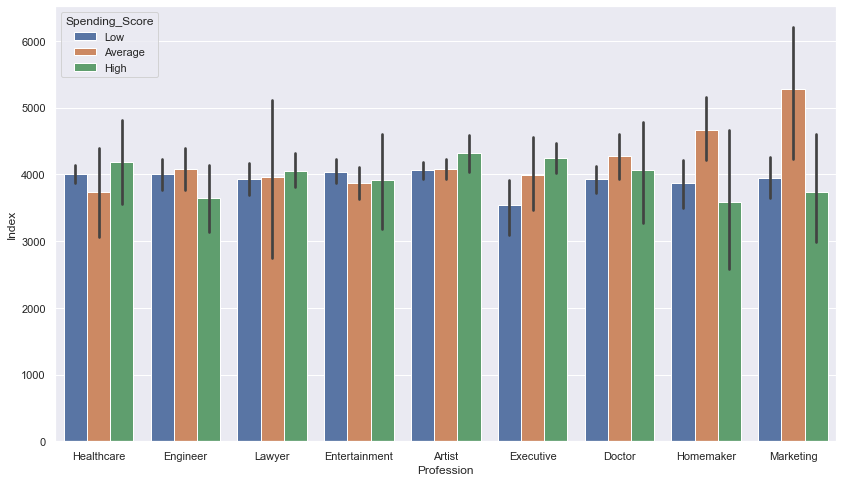

In [58]:
# 1)BAR PLOT 
sns.set(rc = {'figure.figsize':(14,8)})
sns.barplot(x= 'Profession', y = 'Index' , data = CS_data, hue = 'Spending_Score' )
plt.show()

__OBSERVATION-__


Here, from the chart, we can see the customerID and bars represent their Profession with the spending score of of each profession.   

__Now, let’s figure out that how gender could be the reason for customer spend their money__

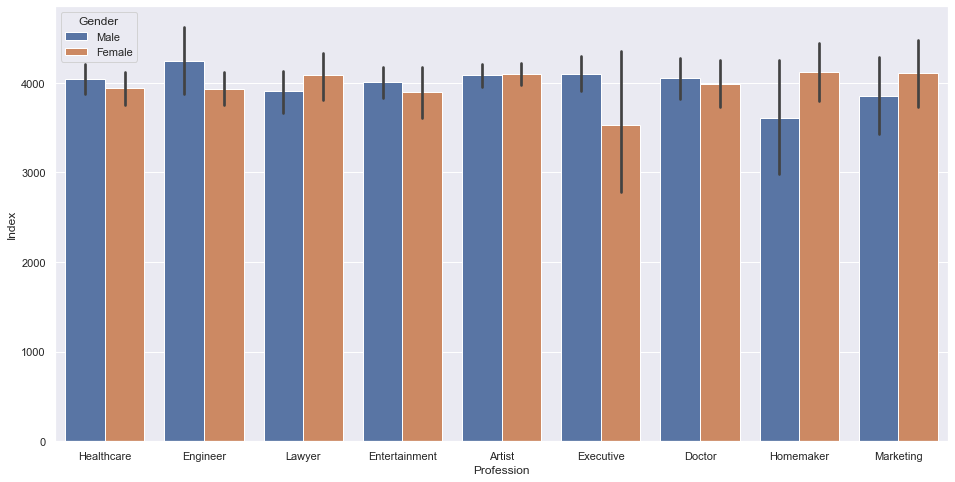

In [169]:
# 1)BAR PLOT 
sns.set(rc = {'figure.figsize':(16,8)})
sns.barplot(x= 'Profession', y = 'Index' , data = CS_data, hue = 'Gender'  )
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the customerID and bars represent their Profession and how profession is divided into male and female.   

__Now, let’s figure out that how Graduated could be the reason for customer spend their money__

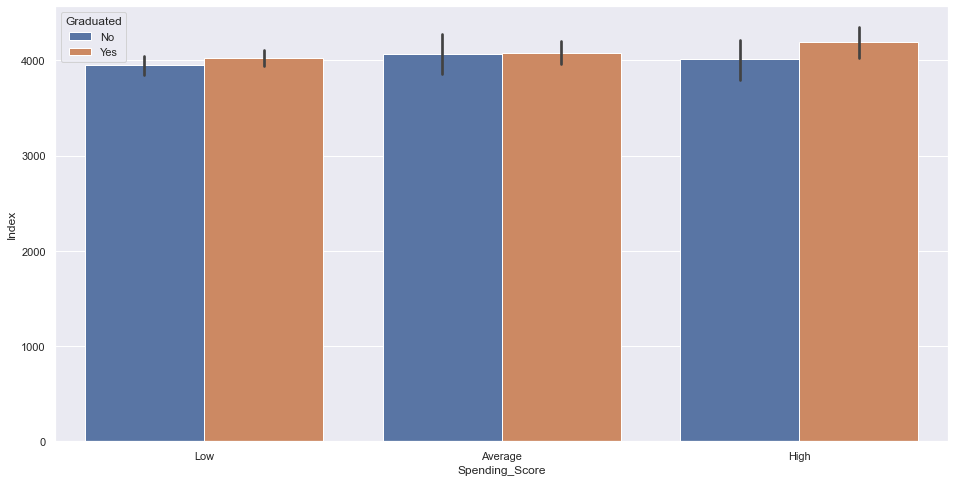

In [168]:
# 1)BAR PLOT 
sns.set(rc = {'figure.figsize':(16,8)})
sns.barplot(x= 'Spending_Score', y = 'Index' , data = CS_data, hue = 'Graduated' )
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the customerID and bars represent their Spending Score and how many people have Graduation in diferent Spending Scores.   



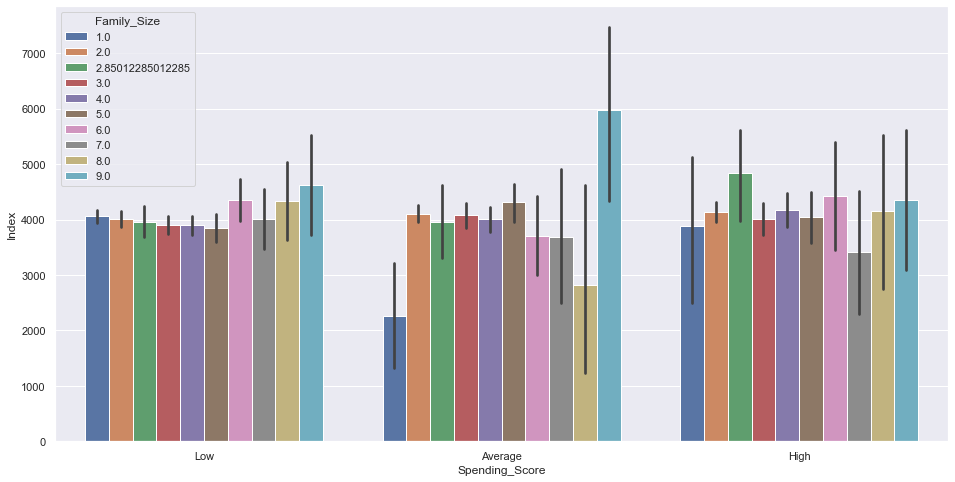

In [140]:
# 1)BAR PLOT 
sns.set(rc = {'figure.figsize':(16,8)})
sns.barplot(x= 'Spending_Score', y = 'Index' , data = CS_data, hue = 'Family_Size' )
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the customerID and bars represent their Profession and how vary in Family Size can lead to spending Score.   

__Now, let’s figure out that how Var_1 could be the reason for customer spend their money__

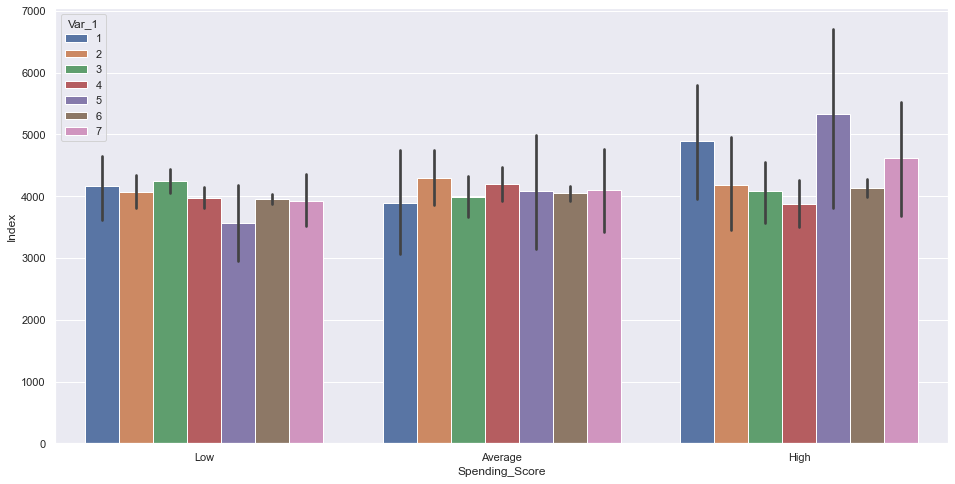

In [148]:
# 1)BAR PLOT 
sns.set(rc = {'figure.figsize':(16,8)})
sns.barplot(x= 'Spending_Score', y = 'Index' , data = CS_data, hue = 'Var_1' )
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the customerID and bars represent their Profession and these different person that are divided into Categories can effect the spending score.   



###  - CustomerID and their spending score based on gender

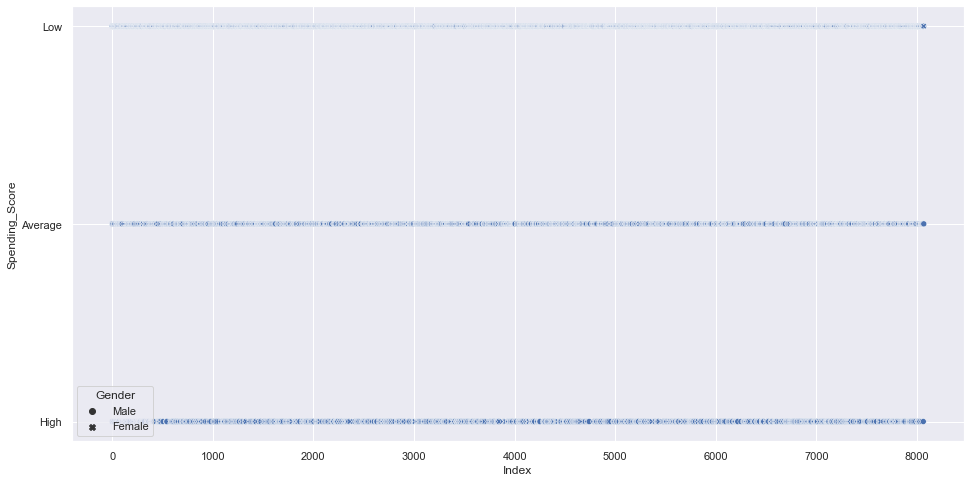

In [121]:
# 2)SCATTER PLOT 
sns.scatterplot(x='Index', y = 'Spending_Score' , data = CS_data, markers = True, style = 'Gender')
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the Customer iD  and spending score for Male and female and how it impact through the density of points in plot. 



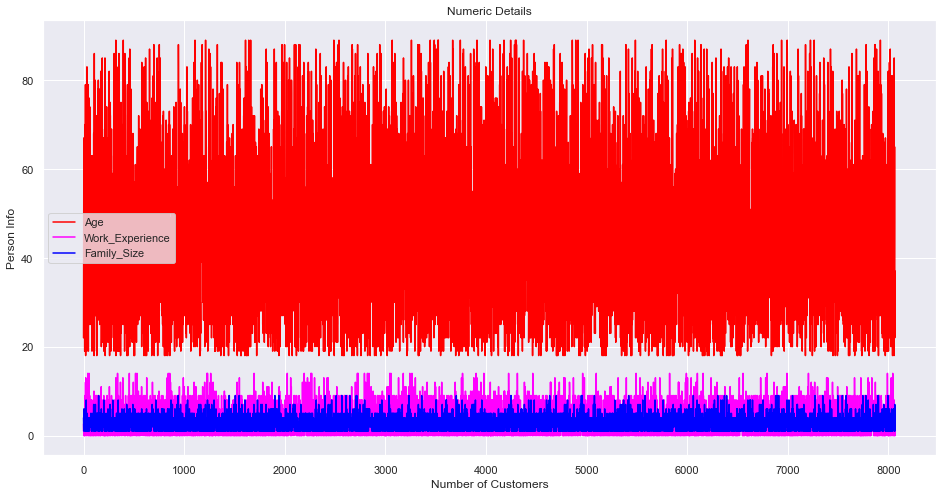

In [171]:
# )LINE plot
plt.plot('Index','Age', label='Age', color='red' , data = CS_data)
plt.plot('Index','Work_Experience', label='Work_Experience', color='magenta', data = CS_data)
plt.plot('Index','Family_Size', label='Family_Size', color='blue', data = CS_data)

plt.legend(loc=6)
plt.xlabel('Number of Customers')
plt.ylabel('Person Info')
plt.title('Numeric Details')
plt.show()

__OBSERVATION-__

Here, from the chart, we can see how Customer's numeric attributes like Age , Work_Experience, Family_Size which we can see in one plot and can identify the range and where the data is more concentrated.


###  - Frequency of Spending score

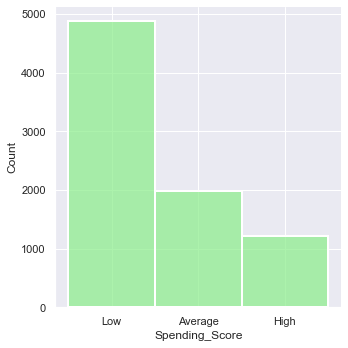

In [17]:
# 4) DISPLOT 
sns.displot(CS_data['Spending_Score'] , color = "lightgreen" , linewidth = 2 , height = 5) 
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the distribution of the customer with spending score and the frequency of it.

like :  low: 4900, 
Avergae : 1900 , 
High:1250.


###  - Age of Male and Female in Spending Score

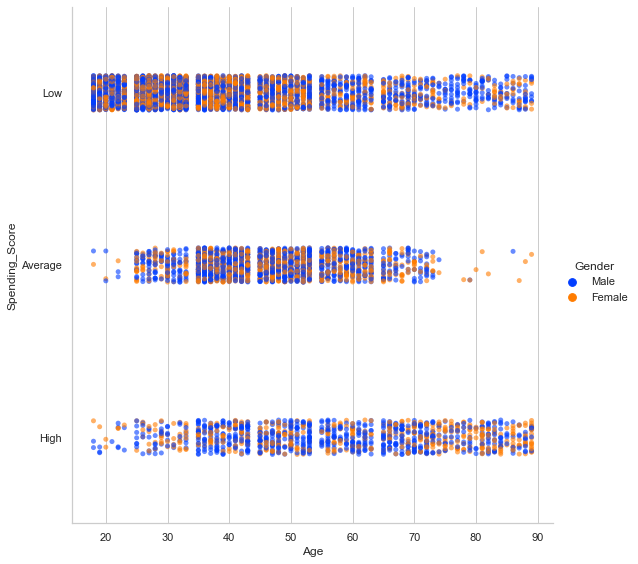

In [18]:
# 5)CAT PLOT
sns.set_theme(style="whitegrid")
sns.catplot(
    data= CS_data,
    x="Age", y="Spending_Score", hue="Gender",
    palette="bright",alpha = 0.6 ,  height= 8
)
plt.show()

__OBSERVATION-__

Here, from the chart, we can see catplot from Age of male and female for spending score.


## 2) Analysis on the basis of Gender

###  - Count male and female

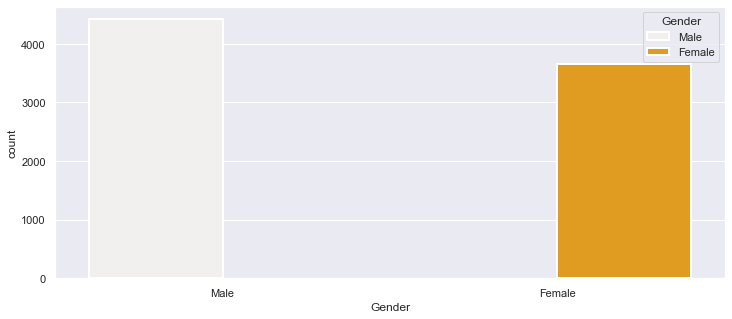

In [146]:
#6)Count plot
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x='Gender',  data = CS_data , color = 'orange' , linewidth = 2, hue = 'Gender', dodge=True, saturation=0.75)
plt.show()

__OBSERVATION-__

Here, from the chart, we can see the data of male and female.

Male = 4500 , Female = 3800

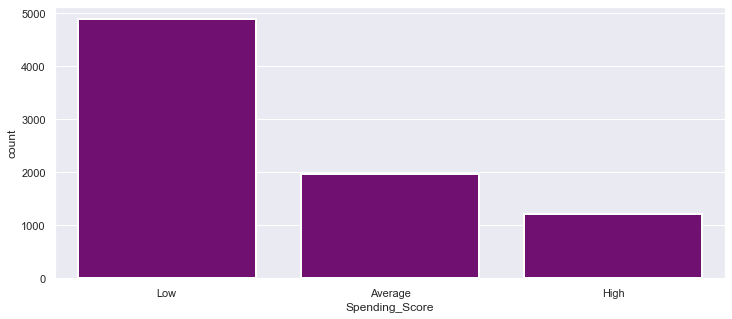

In [153]:
#6)Count plot
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x='Spending_Score',  data = CS_data , color = 'purple' , linewidth = 2, dodge=True, saturation=0.75)
plt.show()

__OBSERVATION-__

Here, from the chart, we can see count of Spending Score.

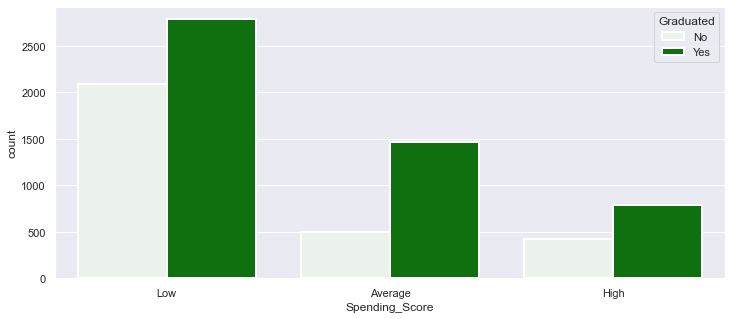

In [172]:
#6)Count plot
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x='Spending_Score',  data = CS_data , color = 'green' , linewidth = 2, hue = 'Graduated', dodge=True, saturation=0.75)
plt.show()

__OBSERVATION-__

Here, from the chart, we can see count of Spending Score based on whether graduated or not.

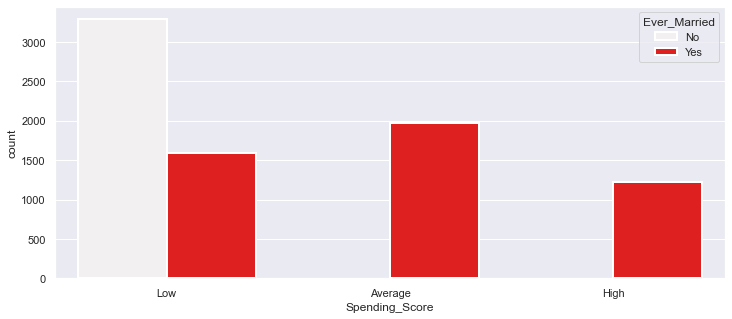

In [173]:
#6)Count plot
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x='Spending_Score',  data = CS_data , color = 'red' , linewidth = 2, hue = 'Ever_Married', dodge=True, saturation=0.75)
plt.show()

__OBSERVATION-__

Here, from the chart, we can see count of Spending Score based on their Marital Status.

###  -  Analysis of every variable with each other

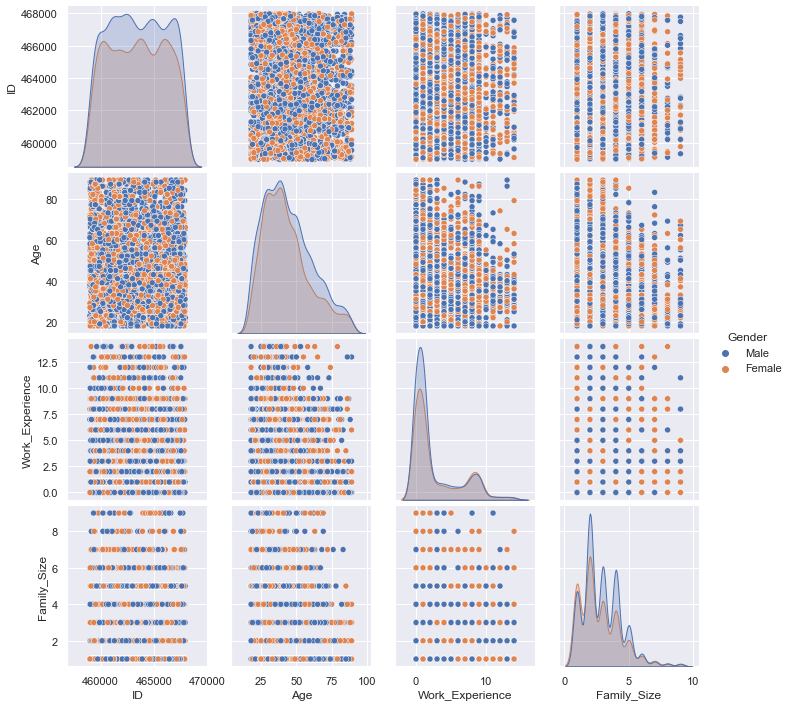

In [20]:
# 7)pairplot
sns.pairplot(CS_data , hue = 'Gender', diag_kind='auto')
plt.show()

__OBSERVATION-__

Here, from the chart, It is the relation of each variable with each other by the help of correlation.

###  -  Analysis of Gender Using Violin plot

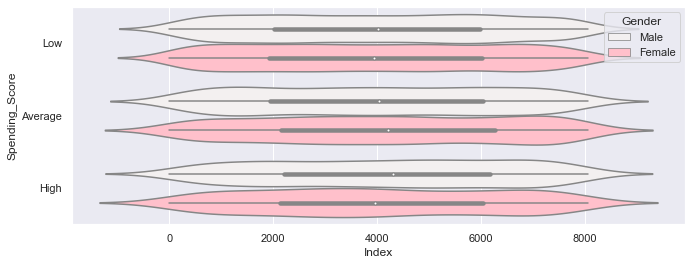

In [147]:
# 8)violin point
sns.set(rc = {'figure.figsize':(11,4)})
sns.violinplot(x='Index',y = 'Spending_Score', data = CS_data , color = "pink" , hue= "Gender" , saturation = 2)
plt.show()

__OBSERVATION-__

Here, from the chart, the data of customerID and gender is distributed and wehere concentrated.

###  -  Analysis of Gender and customerID

E:\Python\anaconda setup\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Python\anaconda setup\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


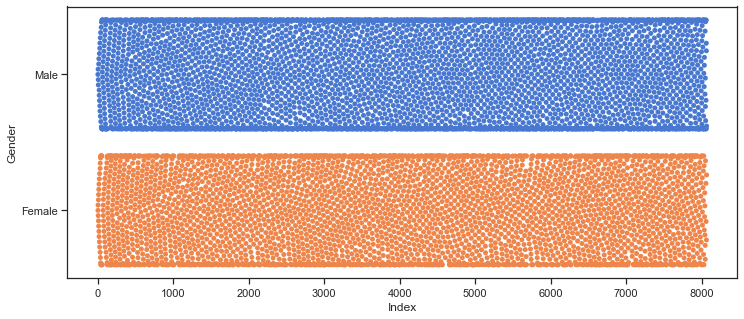

In [177]:
# 9)swarmplot

sns.swarmplot(x='Index', y = 'Gender', data = CS_data)
plt.show()

###  -  Analysis of Gender and customerID using boxplot

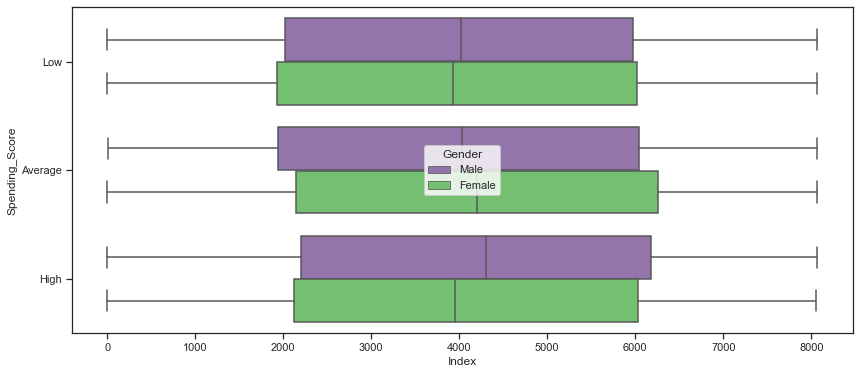

In [189]:
# 10)boxplot
sns.set_theme(style="ticks", palette="muted")
sns.boxplot(x ='Index', y = 'Spending_Score', data = CS_data, hue="Gender", palette=["m", "g"])
plt.show()

__OBSERVATION-__

Here, from the chart, we can check the spread of data.

###  -  Analysis using Heatmap of every variable using correlation

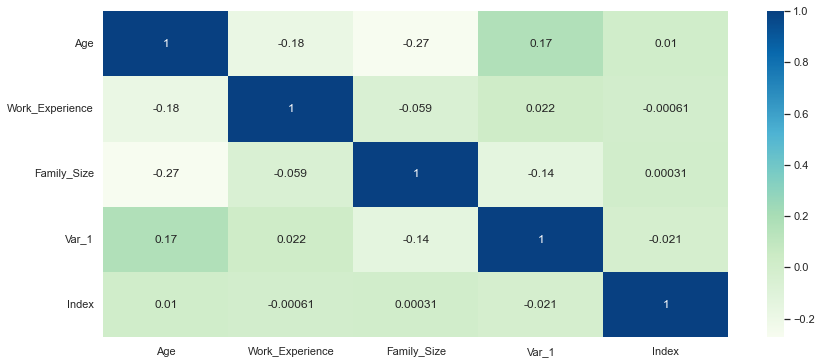

In [178]:
#11)heatmap
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(CS_data.corr() , cmap="GnBu", annot=True)
plt.show()

###  -  Analysis how family size vary

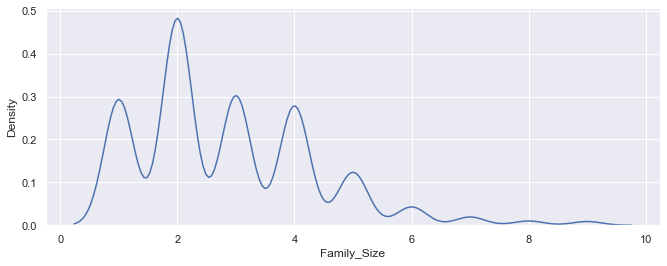

In [29]:
#13)kde plot
sns.set(rc = {'figure.figsize':(11,4)})
sns.kdeplot(CS_data['Family_Size'])
plt.show()

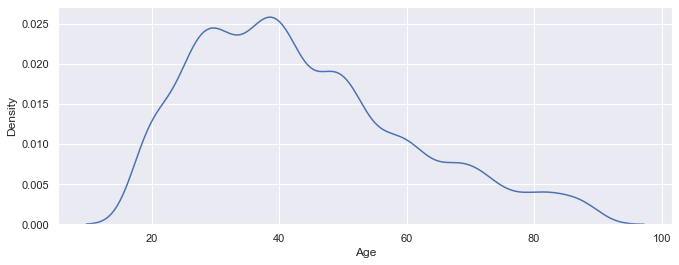

In [167]:
#13)kde plot
sns.set(rc = {'figure.figsize':(11,4)})
sns.kdeplot(CS_data['Age'])
plt.show()

###  -  Analysis of customerid and Spending score in different charts  

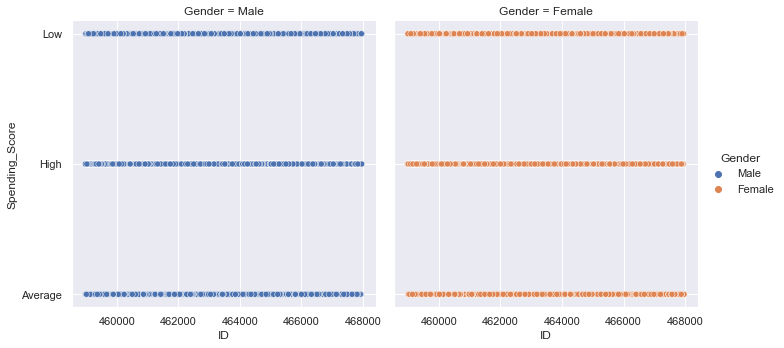

In [30]:
#14)relational plot 
sns.relplot(x='ID', y='Spending_Score ', hue ='Gender', col = "Gender" ,data=CS_data)

__------------------------------------------------------------------------------------------END OF SECTION 2--------------------------------------------------------------------------------------------__
